<a href="https://colab.research.google.com/github/sanusiahmad/OCR-KWH-Listrik/blob/main/OCR_kwh_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imutils

In [ ]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import easyocr
import json
import base64

In [ ]:
img = cv2.imread("kwh3.jpg")

In [ ]:
img = imutils.resize(img,width=300)
cv2.imshow("original image", img)
cv2.waitKey(0)

-1

In [ ]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("grey image", gray_image)
cv2.waitKey(0)

-1

In [ ]:
gray_image = cv2.bilateralFilter(gray_image,11 ,17,17)
cv2.imshow("smoothened image", gray_image)
cv2.waitKey(0)

-1

In [ ]:
edged = cv2.Canny(gray_image,10,50)
cv2.imshow("edged image", edged)
cv2.waitKey(0)

-1

In [ ]:
cnts, new = cv2.findContours(edged.copy(),cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
image1 = img.copy()
cv2.drawContours(image1,cnts,-1,(0,255,0),3)

array([[[165, 175, 184],
        [165, 174, 183],
        [167, 176, 185],
        ...,
        [176, 186, 196],
        [178, 189, 197],
        [175, 185, 194]],

       [[167, 176, 185],
        [167, 176, 185],
        [166, 175, 184],
        ...,
        [178, 188, 198],
        [179, 189, 199],
        [176, 186, 196]],

       [[166, 175, 184],
        [166, 175, 184],
        [165, 174, 183],
        ...,
        [178, 188, 198],
        [179, 189, 199],
        [178, 188, 198]],

       ...,

       [[186, 197, 205],
        [186, 197, 205],
        [187, 198, 206],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[186, 197, 205],
        [186, 197, 205],
        [185, 196, 204],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[185, 196, 204],
        [186, 197, 205],
        [186, 197, 205],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

In [ ]:
cv2.imshow("contours",image1)
cv2.waitKey(0)

-1

In [ ]:
cnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:30]
screenCnt = None
image2 = img.copy()
cv2.drawContours(image2,cnts,1,(0,255,0),3)
cv2.imshow("Top 30 contours", image2)
cv2.waitKey(0)

-1

In [ ]:
i = 7
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c,0.018 * perimeter, True)
    print(len(approx))
    if len(approx) == 4:
        screenCnt = approx
        x,y,w,h = cv2.boundingRect(c)
        new_img = img[y:y+h,x:x+w]
        cv2.imwrite('./'+str(i)+'.jpg',new_img)
        i+=1
        break

4


In [ ]:
screenCnt

array([[[288,  19]],

       [[ 31,  21]],

       [[ 25,  87]],

       [[278,  86]]], dtype=int32)

In [ ]:
mask = np.zeros(gray_image.shape, np.uint8)
new_image = cv2.drawContours(mask, [screenCnt], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

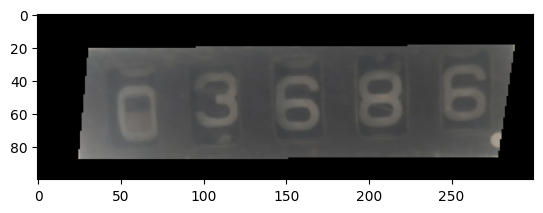

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray_image[x1:x2+1, y1:y2+1]

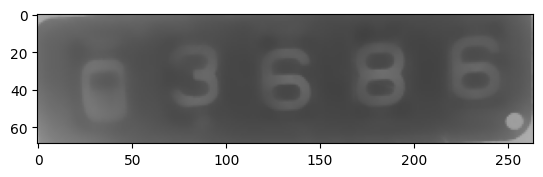

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[13, 3], [258, 3], [258, 64], [13, 64]], '0 3 6 8 6', 0.6375100027586135)]

In [ ]:
text = result[0][-2]
print(text)

0 3 6 8 6


In [ ]:
# 1. Muat gambar dan konversi ke format Base64
def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

image_path = "kwh3.jpg"
encoded_image = image_to_base64(image_path)

# 2. Simpan string Base64 ke dalam JSON bersama dengan data lainnya
data = {
    'image': encoded_image,
    'Character': text
}

# Output the data to a JSON file
output_file = "KWH_Listrik.json"
with open(output_file, "w") as json_file:
    json.dump(data, json_file, indent=4)

print(f"KWH Listrik '{output_file}'.")

KWH Listrik 'KWH_Listrik.json'.
